In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

# 1.Importing Datasets

In [2]:
churn_data=pd.read_csv("data/Customer-Churn-Records.csv")
churn_data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [3]:
seg_data=pd.read_csv("data/segments0324.csv")
seg_data

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,...,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion,Cluster_Label
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,...,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1,3
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,...,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1,2
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,...,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1,3
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,...,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1,4
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,...,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,15995,21,Male,24849,Email,Awareness,8518.308575,0.243792,0.116773,23,...,14.227794,70,13,6,7,286,IsConfid,ToolConfid,0,2
7996,15996,43,Female,44718,SEO,Retention,1424.613446,0.236740,0.190061,49,...,3.501106,52,13,1,5,1502,IsConfid,ToolConfid,0,1
7997,15997,28,Female,125471,Referral,Consideration,4609.534635,0.056526,0.133826,35,...,14.618323,38,16,0,3,738,IsConfid,ToolConfid,1,3
7998,15998,19,Female,107862,PPC,Consideration,9476.106354,0.023961,0.138386,49,...,3.876623,86,1,5,7,2709,IsConfid,ToolConfid,1,3


In [4]:
print("\nChurn Data:")
print(churn_data.info())
print(churn_data.describe())


Churn Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64

In [5]:
print("\nSegmentation Data:")
print(seg_data.info())
print(seg_data.describe())


Segmentation Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases 

# 2.Exploratory Data Analysis

In [6]:
churn_data=churn_data.drop(["RowNumber","CustomerId","Surname" ],axis=1)
seg_data=seg_data[["Age", "Gender","Cluster_Label"]]

For the sake of protecting customer privacy, we eliminate Surname information. RowNumber and CustomerId are not relavant infomation for model training. Cluster_Label is the result of customer segmentation from A1, which is high correlated with the rest of features in segmentation dataset. Thus, we only leave Age and Gender for the purpose of merging datasets except for Cluster_Label"

## 2.1 Univariate Analysis

### 2.1.1 Categorical Variable

/var/folders/qm/8_36rzjx56b399w4_t60jq040000gn/T/ipykernel_96042/602122712.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = churn_data['Geography'], palette = 'coolwarm', ax=axes[0,0])
/var/folders/qm/8_36rzjx56b399w4_t60jq040000gn/T/ipykernel_96042/602122712.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = churn_data['Tenure'], palette = 'coolwarm', ax=axes[0,1])
/var/folders/qm/8_36rzjx56b399w4_t60jq040000gn/T/ipykernel_96042/602122712.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = churn_data['NumOfProducts'],

<Axes: title={'center': 'Satisfaction Score'}, xlabel='Satisfaction Score', ylabel='count'>

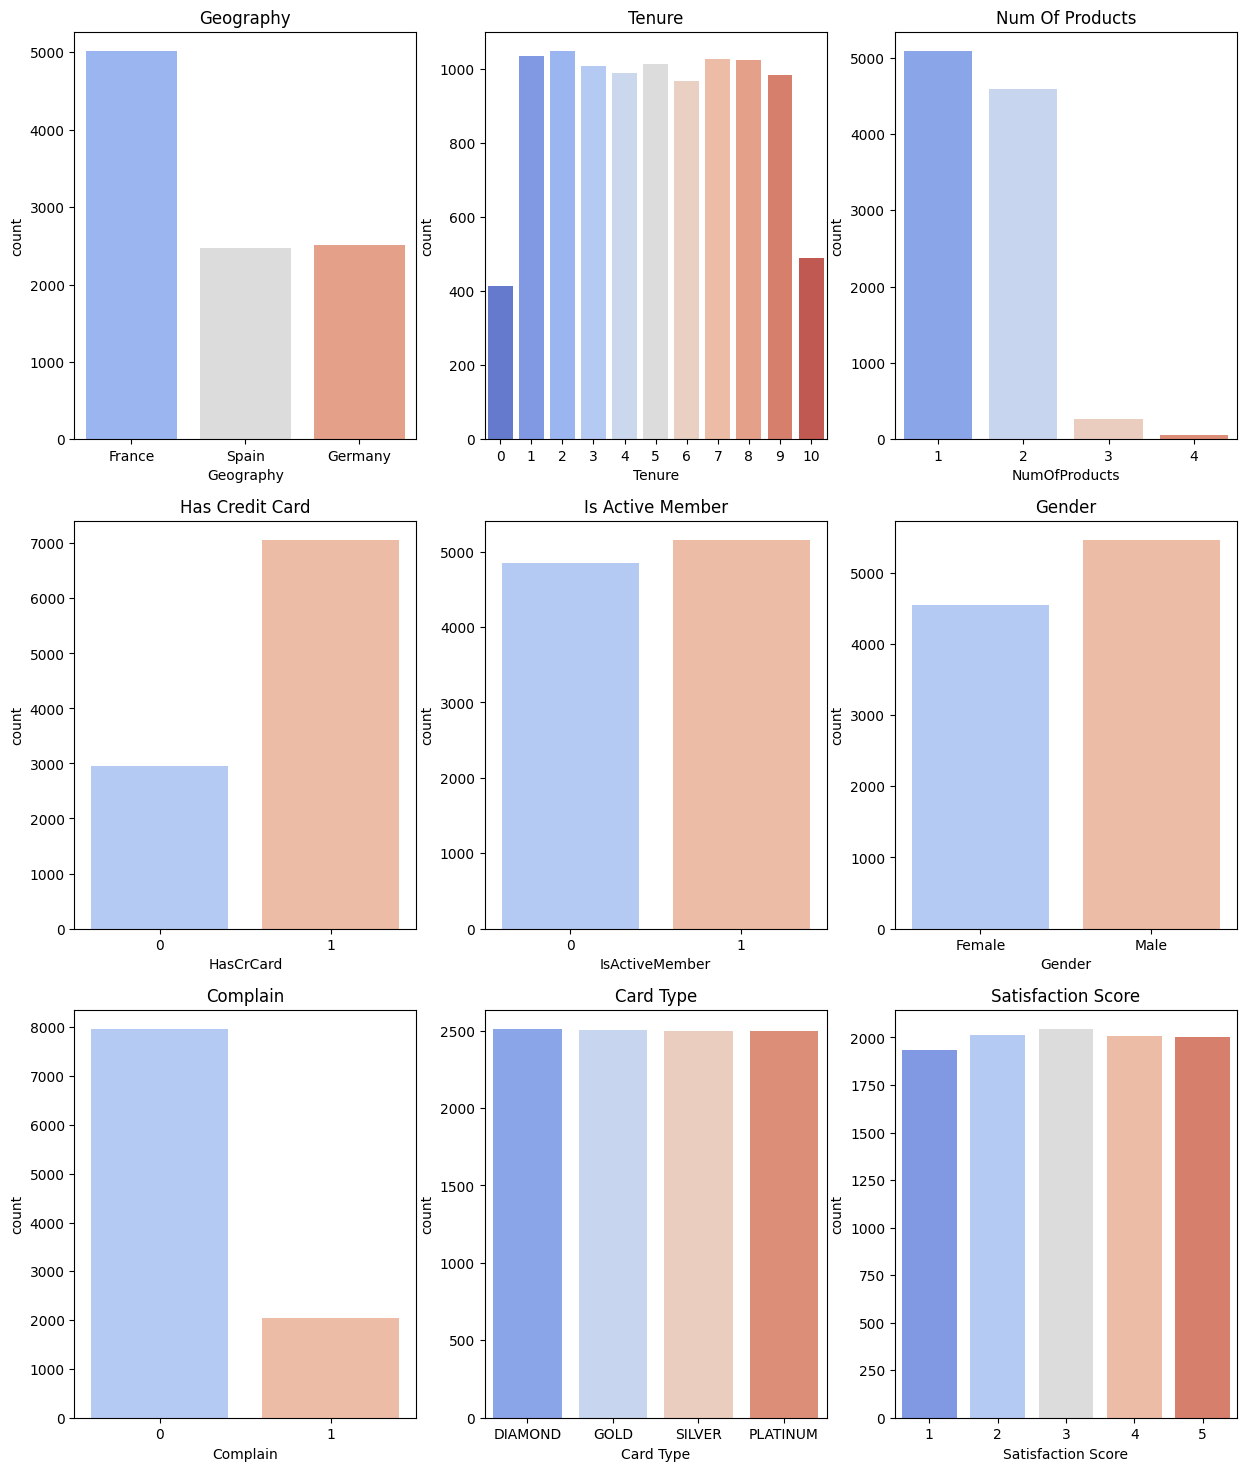

In [7]:
fig, axes = plt.subplots(3, 3, figsize=(15, 18))

axes[0,0].set_title('Geography')
sns.countplot(x = churn_data['Geography'], palette = 'coolwarm', ax=axes[0,0])

axes[0,1].set_title('Tenure')
sns.countplot(x = churn_data['Tenure'], palette = 'coolwarm', ax=axes[0,1])

axes[0,2].set_title('Num Of Products')
sns.countplot(x = churn_data['NumOfProducts'], palette = 'coolwarm', ax=axes[0,2])

axes[1,0].set_title('Has Credit Card')
sns.countplot(x = churn_data['HasCrCard'], palette = 'coolwarm', ax=axes[1,0])

axes[1,1].set_title('Is Active Member')
sns.countplot(x = churn_data['IsActiveMember'], palette = 'coolwarm', ax=axes[1,1])

axes[1,2].set_title('Gender')
sns.countplot(x = churn_data['Gender'], palette = 'coolwarm', ax=axes[1,2])

axes[2,0].set_title('Complain')
sns.countplot(x = churn_data['Complain'], palette = 'coolwarm', ax=axes[2,0])

axes[2,1].set_title('Card Type')
sns.countplot(x = churn_data['Card Type'], palette = 'coolwarm', ax=axes[2,1])

axes[2,2].set_title('Satisfaction Score')
sns.countplot(x = churn_data['Satisfaction Score'], palette = 'coolwarm', ax=axes[2,2])

### 2.1.2 Continuous Variable 

/var/folders/qm/8_36rzjx56b399w4_t60jq040000gn/T/ipykernel_96042/2057718783.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x = churn_data['CreditScore'], palette = 'coolwarm', ax=axes[0,0])
/var/folders/qm/8_36rzjx56b399w4_t60jq040000gn/T/ipykernel_96042/2057718783.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x = churn_data['Age'], palette = 'coolwarm', ax=axes[0,1])
/var/folders/qm/8_36rzjx56b399w4_t60jq040000gn/T/ipykernel_96042/2057718783.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x = churn_data['Balance'], palette = 'coolwarm', ax=axes[0,2])
/var/folders/qm/8_36rzjx56b399w4_t60jq040000gn/T/ipykernel_96042/2057718783.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x = churn_data['EstimatedSalary'], palette = 'coolwarm', ax=axes[1,0])
/var/folders/qm/8_36rzjx56b399w4_t60jq0400

<Axes: title={'center': 'Point Earned'}, xlabel='Point Earned', ylabel='Count'>

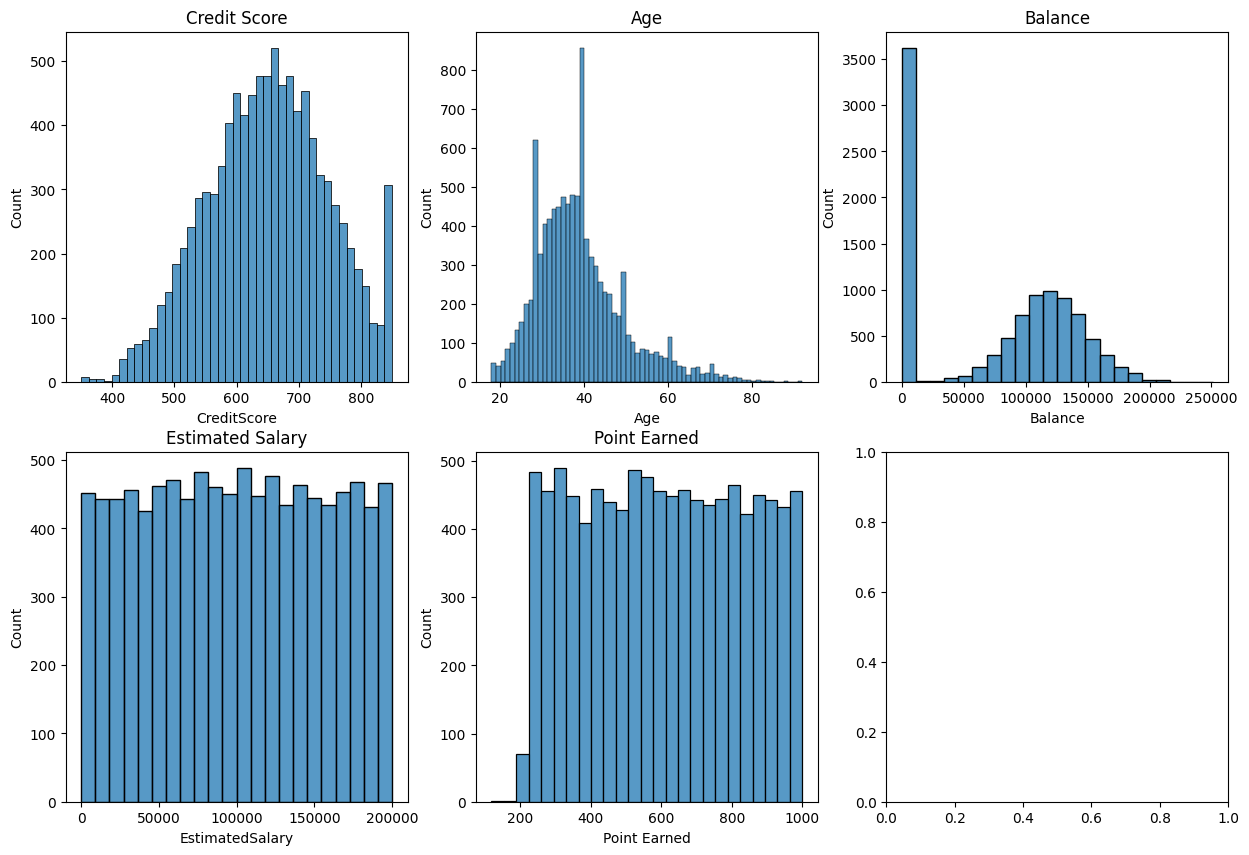

In [12]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0,0].set_title('Credit Score')
sns.histplot(x = churn_data['CreditScore'], palette = 'coolwarm', ax=axes[0,0])

axes[0,1].set_title('Age')
sns.histplot(x = churn_data['Age'], palette = 'coolwarm', ax=axes[0,1])

axes[0,2].set_title('Balance')
sns.histplot(x = churn_data['Balance'], palette = 'coolwarm', ax=axes[0,2])

axes[1,0].set_title('Estimated Salary')
sns.histplot(x = churn_data['EstimatedSalary'], palette = 'coolwarm', ax=axes[1,0])

axes[1,1].set_title('Point Earned')
sns.histplot(x = churn_data['Point Earned'], palette = 'coolwarm', ax=axes[1,1])


## 2.2 Correlational Analysis

<Axes: >

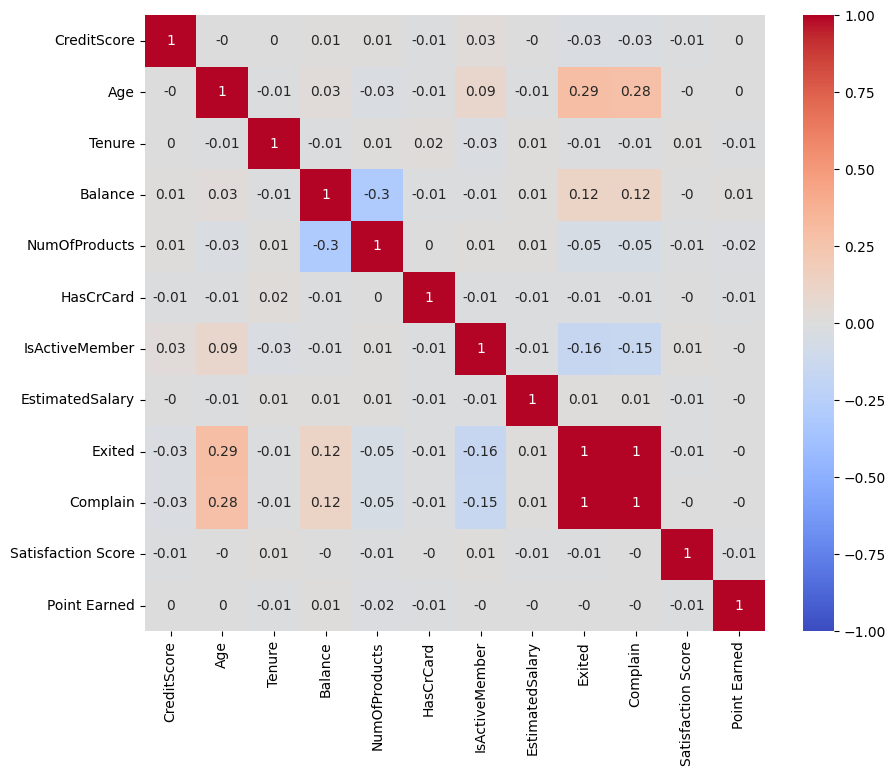

In [13]:
corr = churn_data.drop(['Geography', 'Gender', 'Card Type'], axis=1).corr().round(2)
plt.figure(figsize = (10,8))
sns.heatmap(corr, annot = True, cmap = 'coolwarm',center=0, vmin=-1, vmax=1)

We can see that the Complain variable is perfectly correlated with our label-Exited, so we eliminate the Complain variable. The rest of features do not show strong correlation between each others.

In [14]:
churn_data=churn_data.drop("Complain", axis=1)

## 2.3 Customer Profile Analysis

Text(0.5, 1.0, 'Age Distribution in Segmentation Data')

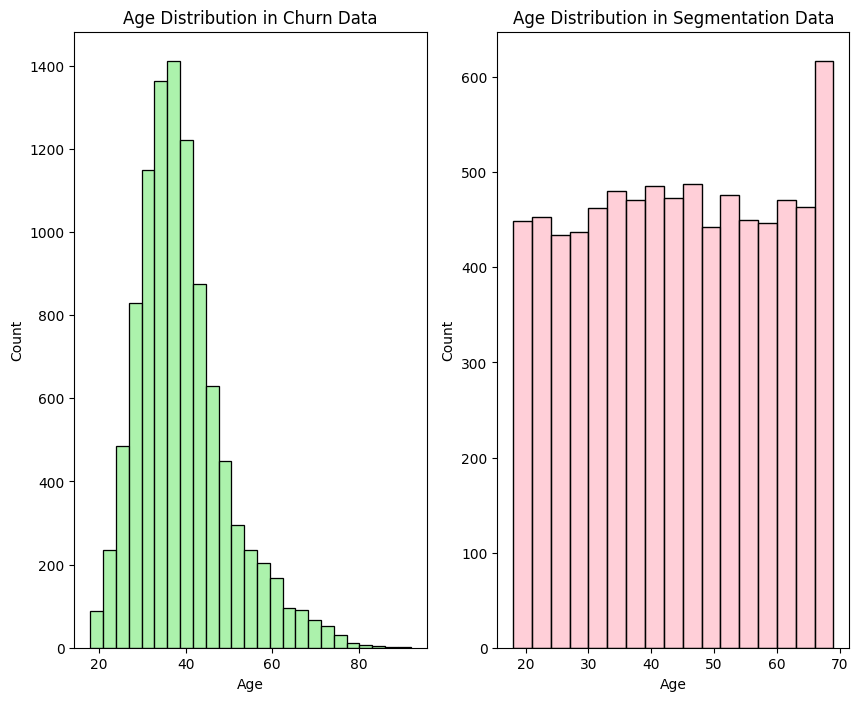

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(10, 8))

sns.histplot(churn_data["Age"],binwidth=3, ax=axes[0], color="lightgreen")
axes[0].set_title("Age Distribution in Churn Data")

sns.histplot(seg_data["Age"], binwidth=3, ax=axes[1], color="pink") 
axes[1].set_title("Age Distribution in Segmentation Data")

Text(0.5, 1.0, 'Gender Distribution in Segmentation Data')

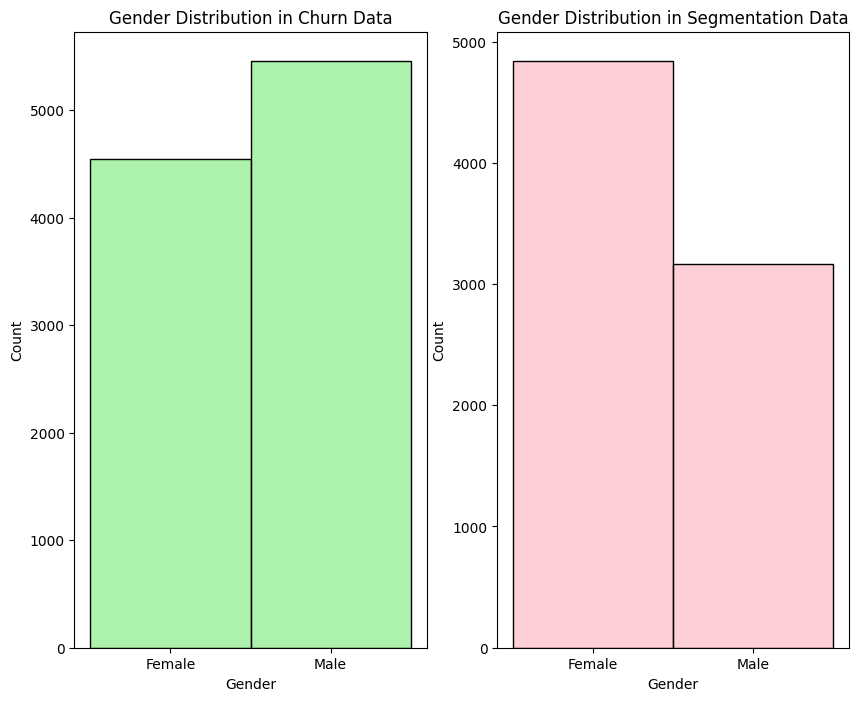

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(10, 8))

sns.histplot(churn_data["Gender"],binwidth=3, ax=axes[0], color="lightgreen")
axes[0].set_title("Gender Distribution in Churn Data")

sns.histplot(seg_data["Gender"], binwidth=3, ax=axes[1], color="pink") 
axes[1].set_title("Gender Distribution in Segmentation Data")

Text(0.5, 1.0, 'Age Distribution across Gender in Segmentation Data')

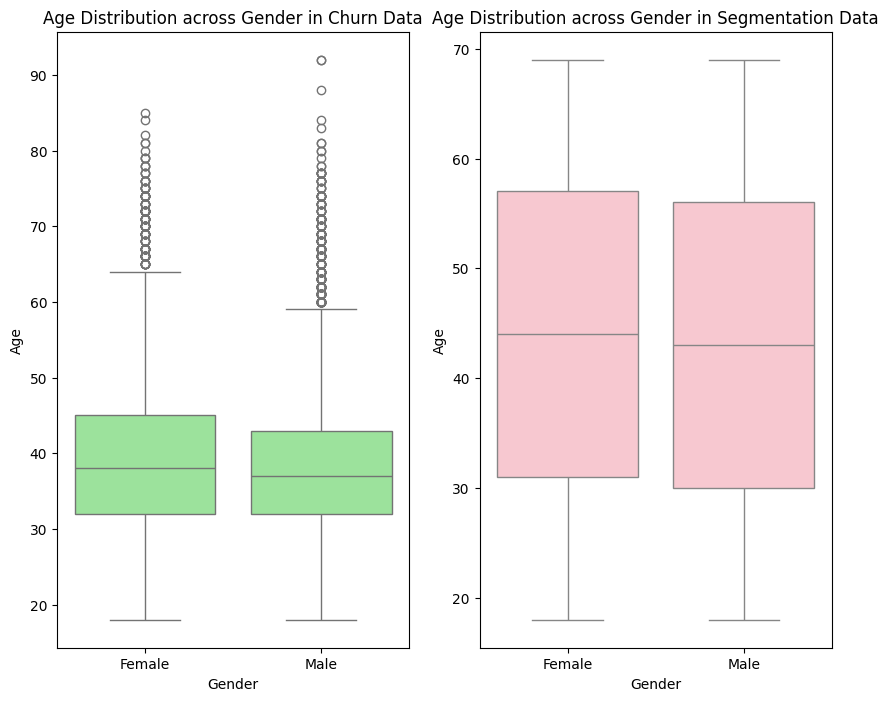

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(10, 8))

sns.boxplot(x=churn_data["Gender"], y= churn_data["Age"], ax=axes[0], color="lightgreen")
axes[0].set_title("Age Distribution across Gender in Churn Data")

sns.boxplot(x=seg_data["Gender"], y=seg_data["Age"], ax=axes[1], color="pink") 
axes[1].set_title("Age Distribution across Gender in Segmentation Data")

From the visualization above, we can see the age and gender distribution in 2 datasets are not the same.

In customer churn dataset, age shows a slightly right skewed normal distribution and the number of males outweights the number of female. For both genders, the mean age is around 37. In customer segmentation dataset, age is more like a uniform distribution and the number of females outweight the number of males. For both genders, the mean age is aroung 43.

However, since the two datasets are not from the same source. We will assume the 2 datasets have similar distribution in terms of customer profile and use them to generate a new sythetic data. 

# 3.Data Preprocessing

In [18]:
churn_train, churn_test = train_test_split(churn_data, random_state=42, stratify=churn_data["Exited"])
seg_train, seg_test = train_test_split(seg_data, random_state=42)

In [19]:
# merge train data
train= pd.merge(
    churn_train,
    seg_train,
    left_on=['Age', 'Gender'],
    right_on=['Age', 'Gender'],
    how='inner'
)

train=train.drop_duplicates()
print(train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 22143 entries, 0 to 423312
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         22143 non-null  int64  
 1   Geography           22143 non-null  object 
 2   Gender              22143 non-null  object 
 3   Age                 22143 non-null  int64  
 4   Tenure              22143 non-null  int64  
 5   Balance             22143 non-null  float64
 6   NumOfProducts       22143 non-null  int64  
 7   HasCrCard           22143 non-null  int64  
 8   IsActiveMember      22143 non-null  int64  
 9   EstimatedSalary     22143 non-null  float64
 10  Exited              22143 non-null  int64  
 11  Satisfaction Score  22143 non-null  int64  
 12  Card Type           22143 non-null  object 
 13  Point Earned        22143 non-null  int64  
 14  Cluster_Label       22143 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 2.7+ MB

In [20]:
hot = pd.get_dummies(train[['Geography', 'Gender', 'Card Type']])
train = pd.concat([train, hot], axis = 1)
train = train.drop(['Geography', 'Gender', 'Card Type'], axis = 1)

In [21]:
X_train=train.drop("Exited",axis=1)
y_train=train["Exited"].astype("category")

<Axes: xlabel='Exited', ylabel='Count'>

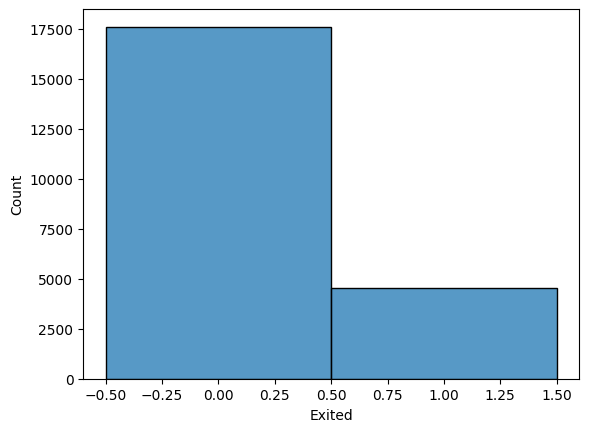

In [22]:
sns.histplot(y_train)

From the plot, we can see that the classes are imbalanced. Thus, we use SMOTE method to generate synthetic data and make the dataset balanced

In [23]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [24]:
X_train_resampled.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Satisfaction Score,Point Earned,Cluster_Label
count,35184.000000,35184.000000,35184.000000,35184.000000,35184.000000,35184.000000,35184.000000,35184.000000,35184.000000,35184.000000,35184.000000
mean,647.885573,40.603570,4.925080,82096.080043,1.459897,0.656662,0.406889,100367.759173,2.914450,603.051558,2.320856
std,93.824475,9.668402,2.810374,61168.738371,0.619336,0.474830,0.491261,57600.780347,1.368355,218.616486,1.601779
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,1.000000,119.000000,0.000000
25%,584.000000,34.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50899.910000,2.000000,416.000000,1.000000
50%,649.000000,40.000000,5.000000,103298.465000,1.000000,1.000000,0.000000,100720.020000,3.000000,603.000000,2.000000
75%,712.000000,47.000000,7.000000,129119.035000,2.000000,1.000000,1.000000,149777.141311,4.000000,785.000000,4.000000
max,850.000000,69.000000,10.000000,222267.630000,4.000000,1.000000,1.000000,199992.480000,5.000000,1000.000000,5.000000


Text: the distribution after smote

In [25]:
test=pd.merge(
    churn_test,
    seg_test,
    left_on=['Age', 'Gender'],
    right_on=['Age', 'Gender'],
    how='inner'
)

test=test.drop_duplicates()
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6845 entries, 0 to 47373
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         6845 non-null   int64  
 1   Geography           6845 non-null   object 
 2   Gender              6845 non-null   object 
 3   Age                 6845 non-null   int64  
 4   Tenure              6845 non-null   int64  
 5   Balance             6845 non-null   float64
 6   NumOfProducts       6845 non-null   int64  
 7   HasCrCard           6845 non-null   int64  
 8   IsActiveMember      6845 non-null   int64  
 9   EstimatedSalary     6845 non-null   float64
 10  Exited              6845 non-null   int64  
 11  Satisfaction Score  6845 non-null   int64  
 12  Card Type           6845 non-null   object 
 13  Point Earned        6845 non-null   int64  
 14  Cluster_Label       6845 non-null   int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 855.6+ KB

In [26]:
hot1 = pd.get_dummies(test[['Geography', 'Gender', 'Card Type' ]])
test = pd.concat([test, hot1], axis = 1)
test = test.drop(['Geography', 'Gender', 'Card Type'], axis = 1)

In [27]:
X_test=test.drop("Exited",axis=1)
y_test=test["Exited"].astype("category")

# 4.Modeling

## 4.1 Logistic Regression

In [28]:
lr = LogisticRegression().fit(X_train_resampled, y_train_resampled)

y_pred_lr = lr.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
confusion_matrix(y_test, y_pred=y_pred_lr)

array([[3813, 1632],
       [ 433,  967]])

In [30]:
accuracy = accuracy_score(y_test, y_pred_lr)

print(classification_report(y_test, y_pred_lr, digits=4))
print("Accuracy score of Logistic Regression: ", accuracy)
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_lr):.2f}")

              precision    recall  f1-score   support

           0     0.8980    0.7003    0.7869      5445
           1     0.3721    0.6907    0.4836      1400

    accuracy                         0.6983      6845
   macro avg     0.6350    0.6955    0.6353      6845
weighted avg     0.7904    0.6983    0.7249      6845

Accuracy score of Logistic Regression:  0.6983199415631848
ROC AUC: 0.70


In [ ]:
Text: performance of logistic regression

## 4.2 Random Forest

In [40]:
rf = RandomForestClassifier(n_estimators = 100, min_samples_leaf=0.12,  criterion = 'entropy', random_state = 42)
rf.fit(X_train_resampled, y_train_resampled)

y_pred_rf = rf.predict(X_test)

In [41]:
confusion_matrix(y_test, y_pred_rf)

array([[4228, 1217],
       [ 420,  980]])

In [43]:
print(rf.score(X_test,y_test))
print(classification_report(y_test, y_pred_rf))
print("Accuracy score of Random Forest: ", accuracy)
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_rf):.2f}")

0.7608473338203068
              precision    recall  f1-score   support

           0       0.91      0.78      0.84      5445
           1       0.45      0.70      0.54      1400

    accuracy                           0.76      6845
   macro avg       0.68      0.74      0.69      6845
weighted avg       0.81      0.76      0.78      6845

Accuracy score of Random Forest:  0.6983199415631848
ROC AUC: 0.74


Text: Random Forest performance

### 4.2.2 Random Forest with grid search

In [50]:
params_rf = {'n_estimators': [ 300,400, 500, 600],
             'max_depth': [2, 3, 4, 5],
             'min_samples_split': [2, 3, 4, 5],
             'min_samples_leaf': [0.04,0.06, 0.08, 0.12],
             'max_features': ['log2','sqrt'],
            'criterion':['entropy', 'gini']
}
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       cv=3,
                       scoring='roc_auc',
                       verbose=1,
                       n_jobs=-1)

In [51]:
grid_rf.fit(X_train_resampled, y_train_resampled)

Fitting 3 folds for each of 1024 candidates, totalling 3072 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(criterion='entropy',
                                              min_samples_leaf=0.12,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 3, 4, 5],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [0.04, 0.06, 0.08, 0.12],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [300, 400, 500, 600]},
             scoring='roc_auc', verbose=1)

In [60]:
y_pred_gridrf = grid_rf.predict(X_test)

confusion_matrix(y_test, y_pred_gridrf)

array([[4419, 1026],
       [ 444,  956]])

In [62]:
print("Accuracy score of Random Forest with Grid Search: ",grid_rf.score(X_test,y_test))
print(classification_report(y_test, y_pred_gridrf))
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_gridrf):.2f}")

Accuracy score of Random Forest with Grid Search:  0.8241488915125279
              precision    recall  f1-score   support

           0       0.91      0.81      0.86      5445
           1       0.48      0.68      0.57      1400

    accuracy                           0.79      6845
   macro avg       0.70      0.75      0.71      6845
weighted avg       0.82      0.79      0.80      6845

ROC AUC: 0.75


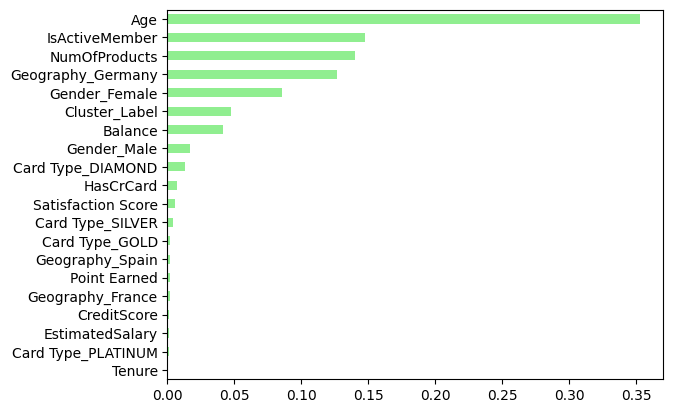

In [66]:
importances = pd.Series(grid_rf.best_estimator_.feature_importances_, index = X_train_resampled.columns)                                 
sorted_importances = importances.sort_values()   
sorted_importances.plot(kind='barh', color='lightgreen'); 
plt.show()

Text: performance of random forest with grid search

### 4.2.3 Gradient Boosting

In [71]:
parameters = {'learning_rate': [ 0.05, 0.07, 0.1, 0.3, 0.5],
              'n_estimators': [300, 500, 600]
             }


gb = GradientBoostingClassifier()
grid_gb = RandomizedSearchCV(model, parameters, cv = 5, n_jobs = -1)
grid_gb.fit(X_train_resampled, y_train_resampled)

print('Learning Rate: ', gridGradient.best_estimator_.learning_rate)
print('Score: ', gridGradient.best_score_)

Learning Rate:  0.3
Score:  0.9080557910300003


In [72]:
y_pred_gridgb = grid_gb.predict(X_test)

print(classification_report(y_test, y_pred_gridgb, digits=4))
print("Accuracy score of Gradient Boosting with Random Search: ", grid_gb.score(X_test,y_test))
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_gridgb):.2f}")

              precision    recall  f1-score   support

           0     0.8923    0.9067    0.8994      5445
           1     0.6128    0.5743    0.5929      1400

    accuracy                         0.8387      6845
   macro avg     0.7525    0.7405    0.7462      6845
weighted avg     0.8351    0.8387    0.8367      6845

Accuracy score of Gradient Boosting with Random Search:  0.8387143900657414
ROC AUC: 0.74


Text: performance for gradient boosting with random search